In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from lightgbm import LGBMRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor

In [6]:
def load_dataset():
  return pd.read_csv("/content/Visa_For_Lisa_Loan_dataset.csv")
data = load_dataset()
data.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [7]:
def print_information_about_data(data):
  data.info()
print_information_about_data(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
def print_description_about_data(data):
  print(data.describe())
print_description_about_data(data)

                ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000  

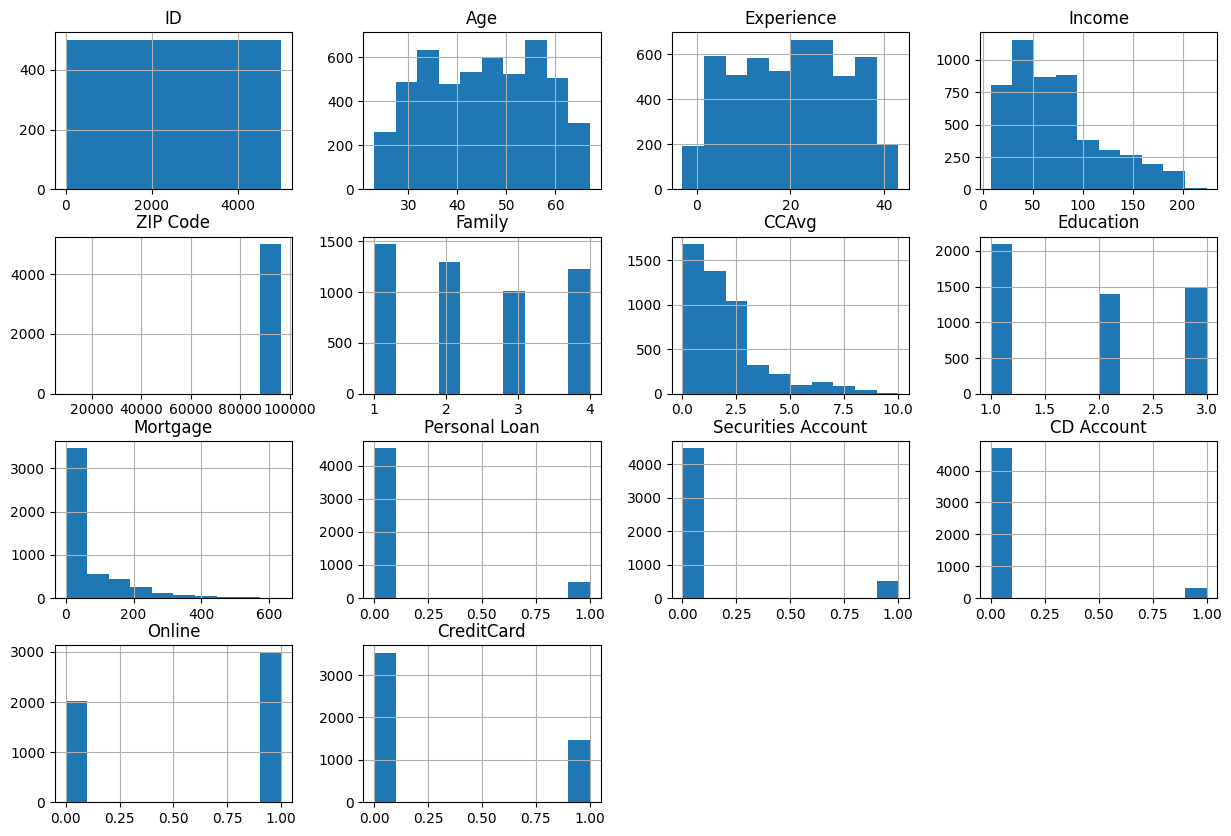

In [9]:
def prirnt_histograms(data):
  data.hist(bins=10,figsize=(15,10))
prirnt_histograms(data)

In [10]:
data.shape

(5000, 14)

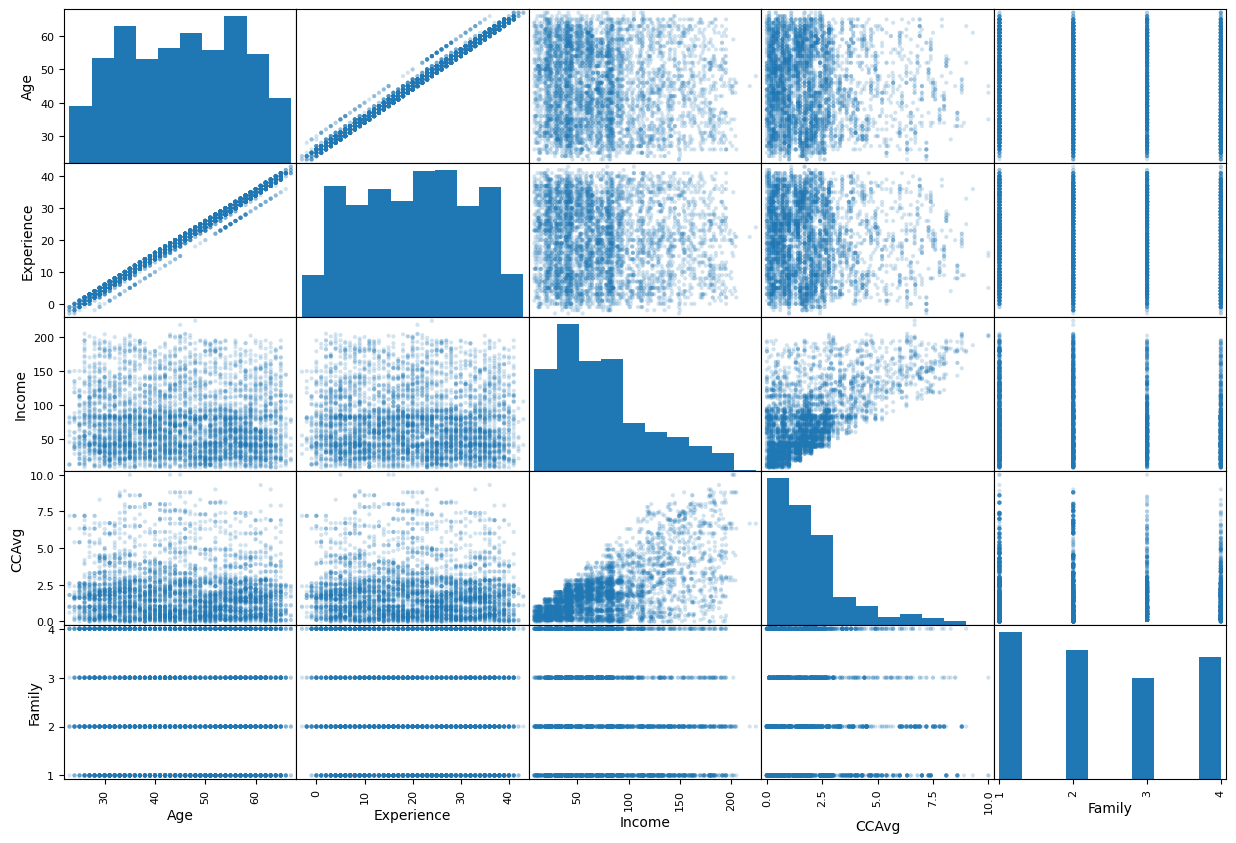

In [11]:
def print_scatter_matrix(data):
  df = data[['Age','Experience','Income','CCAvg','Family']]
  pd.plotting.scatter_matrix(df, alpha=0.2, figsize=(15,10))
print_scatter_matrix(data)

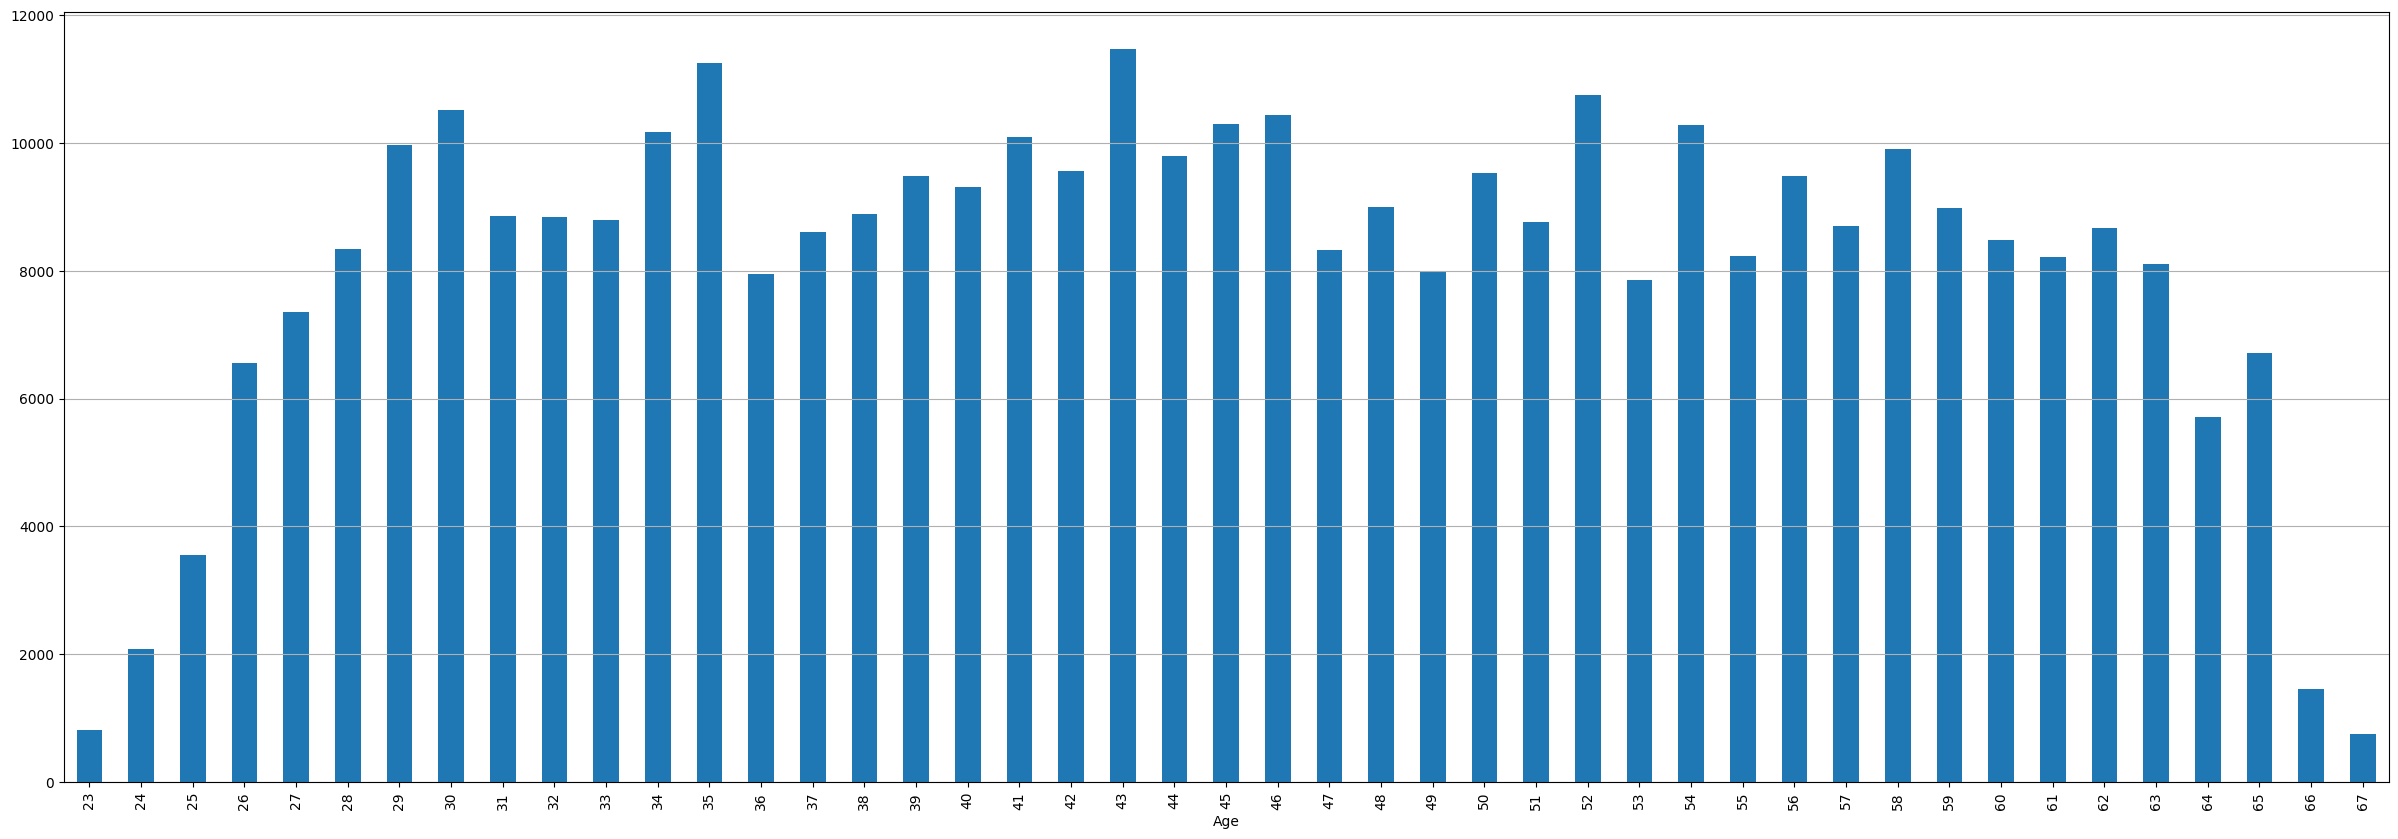

In [12]:
def visualization_of_Age_Income(data):
  data.groupby('Age').sum()['Income'].plot(kind = 'bar', figsize=(30,10))
  plt.grid(axis = 'y')
visualization_of_Age_Income(data)


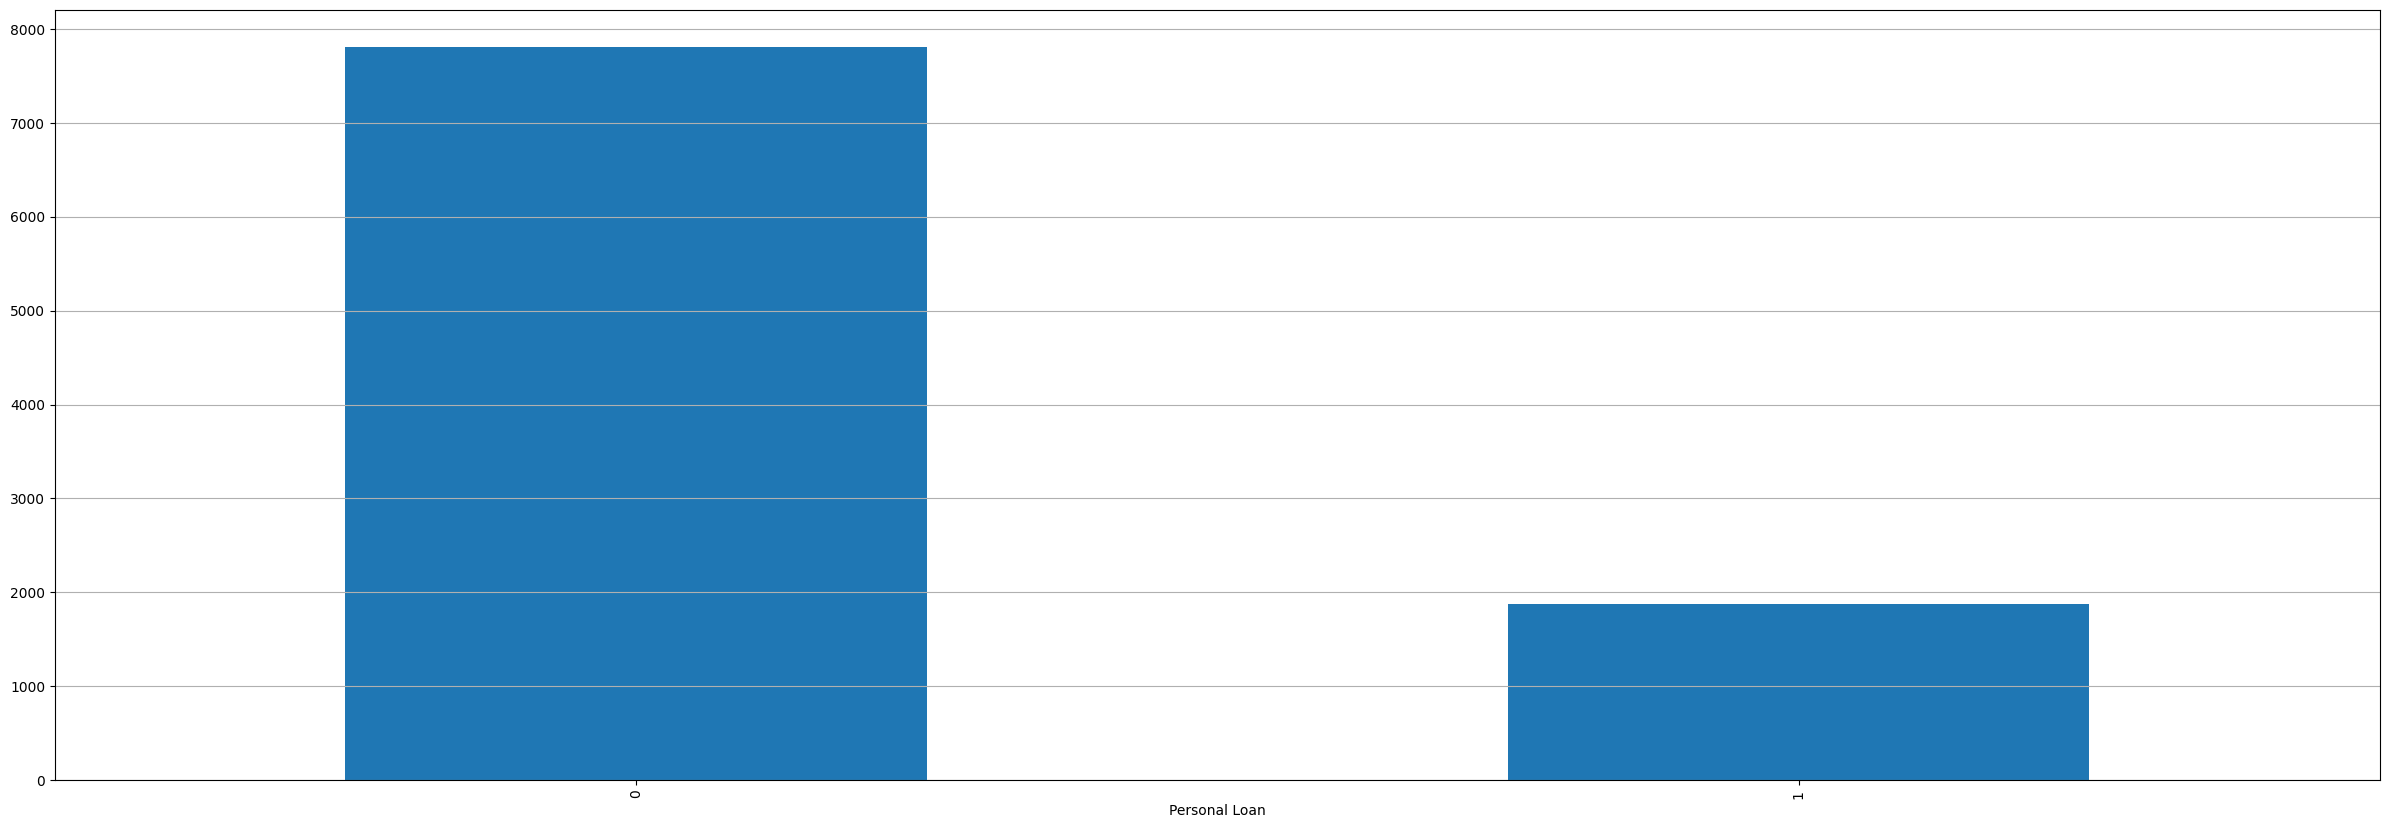

In [13]:
def visualization_of_Personal_Loan_CCAvg(data):
  data.groupby('Personal Loan').sum()['CCAvg'].plot(kind = 'bar', figsize=(30,10))
  plt.grid(axis = 'y')
visualization_of_Personal_Loan_CCAvg(data)

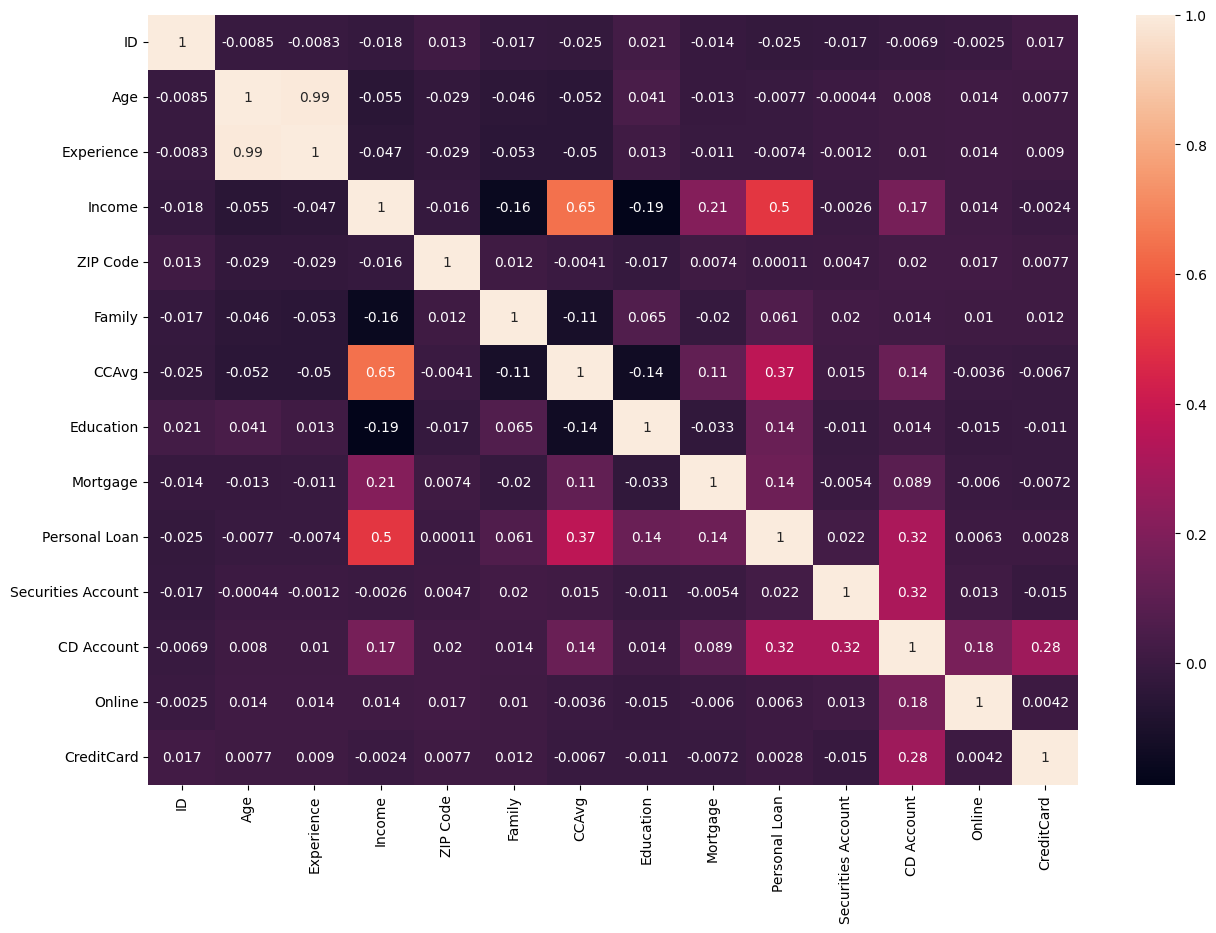

In [14]:
def compute_correlations_matrix_with_seaborn_visualization(data):
  cor=data.corr()
  plt.subplots(figsize=(15,10))
  sns.heatmap(cor,annot=True)
compute_correlations_matrix_with_seaborn_visualization(data)

In [15]:
def compute_correlations_matrix(dataset):
  correlations = dataset.corr()
  res = correlations["Personal Loan"].abs().sort_values(ascending=False)
  print(res)
compute_correlations_matrix(data)

Personal Loan         1.000000
Income                0.502462
CCAvg                 0.366889
CD Account            0.316355
Mortgage              0.142095
Education             0.136722
Family                0.061367
ID                    0.024801
Securities Account    0.021954
Age                   0.007726
Experience            0.007413
Online                0.006278
CreditCard            0.002802
ZIP Code              0.000107
Name: Personal Loan, dtype: float64


In [16]:
def visa_for_lisa_fit_model_prediction(data):
    X = data[['Income', 'CCAvg','CD Account', 'Mortgage','Education', 'Family', 'CreditCard']]
    y = data['Personal Loan']
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 16)
    models = {"KNeighborsRegressor":KNeighborsRegressor(), "LinearRegression":LinearRegression(),
              "DecisionTreeRegressor":DecisionTreeRegressor(), "LGBMRegressor":LGBMRegressor(n_estimators=1000)}
    print("Models accuracy:")
    for key, model in models.items():
      model.fit(x_train,y_train)
      y_pred = model.predict(x_test)
      print(f"{key}: {round(r2_score(y_test,y_pred)*100)}%")
visa_for_lisa_fit_model_prediction(data)

Models accuracy:
KNeighborsRegressor: 37%
LinearRegression: 39%
DecisionTreeRegressor: 81%
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000801 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 514
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 7
[LightGBM] [Info] Start training from score 0.094000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv